Dataset: https://en.volleyballworld.com/volleyball/competitions/volleyball-olympic-games-paris-2024/statistics/men/best-scorers/

In [895]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

# Tratamento de Dados

## Dados Masculinos da Olimpiada de París

In [896]:
# Read the CSV file
paris_men_attackers = pd.read_csv("datasets/Olympics-paris-men/olympics_paris_men_attackers.txt")
# View the first 5 rows
paris_men_attackers.head()

,Rank-attacker,Player-Name,Team,Points-attacks,Errors-attack,Attempts-shots-attack,average-per-match-attack,Success-percent-attack,Total-attack
0,1,Romanò,ITA,88,16,50,14.67,57.14,154
1,2,Leon,POL,81,28,74,13.50,44.26,183
2,3,Anderson,USA,80,20,58,13.33,50.63,158
3,4,Russell,USA,78,13,53,13.00,54.17,144
4,5,Ngapeth,FRA,75,35,61,12.50,43.86,171


In [897]:
# Get a list of all CSV files in a directory
csv_files = glob.glob('datasets/Olympics-paris-men/*.txt')

# Create an empty dataframe to store the combined data
df_paris_men = paris_men_attackers[["Player-Name","Team"]].copy()

# Loop through each CSV file and append its contents to the combined dataframe
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df = df.drop(columns=['Team']) # For error prevention in merge
    df_paris_men = pd.merge(df, df_paris_men, on='Player-Name', suffixes=("","")).fillna(0)

# Create the teams_men DataFrame with total matches
df_temp = df_paris_men.drop_duplicates(['Team'])
teams_men = pd.DataFrame({
    "Team": df_temp["Team"],
    "total-matches": [4, 6, 6, 4, 6, 6, 4, 3, 4, 3, 3, 3]  # datas from https://en.volleyballworld.com/volleyball/competitions/volleyball-olympic-games-paris-2024/schedule/#fromDate=2024-08-10
})

# Merge df_paris_men with teams_men to add total-matches
df_paris_men = pd.merge(df_paris_men, teams_men, on='Team', suffixes=("", "")).fillna(0)

# Print the combined dataframe
print("Número de colunas:", len(df_paris_men.columns))
print(df_paris_men.columns)


Número de colunas: 50
Index(['Rank-setter', 'Player-Name', 'Successful-setter', 'Errors-setter',
       'Attempts-setter', 'average-per-match-setter', 'Success-percent-setter',
       'Total-setter', 'Rank-server', 'serve-points', 'Errors-serve',
       'Attemps-serve', 'average-per-match-server', 'Success-percent-serve',
       'Total-serve', 'Rank-scores', 'Points', 'Attack-Points', 'Block-Points',
       'Serve-Points', 'Rank-receiver', 'Succesful-receive', 'Errors-receive',
       'Attemps-receive', 'average-per-match-receive',
       'Success-percent-receive', 'Total-receive', 'Rank-digger',
       'Successful-dig', 'Errors-dig', 'Receptions-dig',
       'average-per-match-dig', 'Success-percent-dig', 'Total-dig',
       'Rank-blocker', 'Succesful-blocks', 'Errors-block', 'Rebounds-block',
       'average-per-match-block', 'Efficiency-percent-block', 'Total-block',
       'Rank-attacker', 'Points-attacks', 'Errors-attack',
       'Attempts-shots-attack', 'average-per-match-attack'

In [898]:
# Normalize the data per total-match from each player
df_paris_men[['Rank-setter', 'Successful-setter', 'Errors-setter',
       'Attempts-setter', 'Total-setter', 'Rank-server', 'serve-points', 'Errors-serve',
       'Attemps-serve', 'Total-serve', 'Rank-scores', 'Points', 'Attack-Points', 'Block-Points',
       'Serve-Points', 'Rank-receiver', 'Succesful-receive', 'Errors-receive',
       'Attemps-receive', 'Total-receive', 'Rank-digger',
       'Successful-dig', 'Errors-dig', 'Receptions-dig',
       'Total-dig', 'Rank-blocker', 'Succesful-blocks', 'Errors-block', 'Rebounds-block',
       'Total-block','Rank-attacker', 'Points-attacks', 'Errors-attack',
       'Attempts-shots-attack', 'Total-attack']] = df_paris_men[['Rank-setter', 'Successful-setter', 'Errors-setter',
       'Attempts-setter', 'Total-setter', 'Rank-server', 'serve-points', 'Errors-serve',
       'Attemps-serve', 'Total-serve', 'Rank-scores', 'Points', 'Attack-Points', 'Block-Points',
       'Serve-Points', 'Rank-receiver', 'Succesful-receive', 'Errors-receive',
       'Attemps-receive', 'Total-receive', 'Rank-digger',
       'Successful-dig', 'Errors-dig', 'Receptions-dig',
       'Total-dig', 'Rank-blocker', 'Succesful-blocks', 'Errors-block', 'Rebounds-block',
       'Total-block','Rank-attacker', 'Points-attacks', 'Errors-attack',
       'Attempts-shots-attack', 'Total-attack']].div(df_paris_men["total-matches"], axis=0)

## Dados Femininos da Olimpiada de París

In [899]:
# Read the CSV file
paris_women_attackers = pd.read_csv("datasets/Olympics-paris-women/olympics_paris_women_attackers.txt")
# View the first 5 rows
paris_women_attackers.head()

,Rank-attacker,Player-Name,Team,Points-attacks,Errors-attack,Attempts-shots-attack,average-per-match-attack,Success-percent-attack,Total-attack
0,1,Vargas,TUR,145,53,115,24.17,46.33,313
1,2,Gabi,BRA,97,20,89,16.17,47.09,206
2,3,Egonu,ITA,95,20,92,15.83,45.89,207
3,4,Bošković,SRB,93,35,74,23.25,46.04,202
4,5,Drews,USA,90,28,83,15.00,44.78,201


In [900]:
# Get a list of all CSV files in a directory
csv_files = glob.glob('datasets/Olympics-paris-women/*.txt')

# Create an empty dataframe to store the combined data
df_paris_women = paris_women_attackers[["Player-Name","Team"]].copy()

# Loop through each CSV file and append its contents to the combined dataframe
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df = df.drop(columns=['Team']) # For error prevention in merge
    df_paris_women = pd.merge(df, df_paris_women, on='Player-Name', suffixes=("","")).fillna(0)

# Create the teams_men DataFrame with total matches
df_temp = df_paris_women.drop_duplicates(['Team'])

teams_women = pd.DataFrame({
    "Team": df_temp["Team"],
    "total-matches": [6, 4, 6, 6, 6, 4, 4, 4, 5, 3, 3, 3]  # datas from https://en.volleyballworld.com/volleyball/competitions/volleyball-olympic-games-paris-2024/schedule/#fromDate=2024-08-10
})

# Merge df_paris_women with teams_women to add total-matches
df_paris_women = pd.merge(df_paris_women, teams_women, on='Team', suffixes=("", "")).fillna(0)

# Print the combined dataframe
print("Número de colunas:", len(df_paris_women.columns))
print(df_paris_women.columns)
df_temp

Número de colunas: 50
Index(['Rank-setter', 'Player-Name', 'Successful-setter', 'Errors-setter',
       'Attempts-setter', 'average-per-match-setter', 'Success-percent-setter',
       'Total-setter', 'Rank-server', 'serve-points', 'Errors-serve',
       'Attemps-serve', 'average-per-match-server', 'Success-percent-serve',
       'Total-serve', 'Rank-scores', 'Points', 'Attack-Points', 'Block-Points',
       'Serve-Points', 'Rank-receiver', 'Succesful-receive', 'Errors-receive',
       'Attemps-receive', 'average-per-match-receive',
       'Success-percent-receive', 'Total-receive', 'Rank-digger',
       'Successful-dig', 'Errors-dig', 'Receptions-dig',
       'average-per-match-dig', 'Success-percent-dig', 'Total-dig',
       'Rank-blocker', 'Succesful-blocks', 'Errors-block', 'Rebounds-block',
       'average-per-match-block', 'Efficiency-percent-block', 'Total-block',
       'Rank-attacker', 'Points-attacks', 'Errors-attack',
       'Attempts-shots-attack', 'average-per-match-attack'

,Rank-setter,Player-Name,Successful-setter,Errors-setter,Attempts-setter,average-per-match-setter,Success-percent-setter,Total-setter,Rank-server,serve-points,...,Efficiency-percent-block,Total-block,Rank-attacker,Points-attacks,Errors-attack,Attempts-shots-attack,average-per-match-attack,Success-percent-attack,Total-attack,Team
0,1,Poulter,162,2,340,27.00,32.14,504,2,6,...,-20.00,30,47,2,2,7,0.33,18.18,11,USA
1,2,Diao L.Y.,149,4,256,37.25,36.43,409,4,4,...,-25.00,44,45,4,0,5,1.00,44.44,9,CHN
2,3,E. Şahin,139,7,331,23.17,29.14,477,5,3,...,-25.64,39,39,10,3,10,1.67,43.48,23,TUR
3,4,Roberta,123,4,305,20.50,28.47,432,4,4,...,-42.42,33,48,1,0,6,0.17,14.29,7,BRA
4,5,Orro,105,0,299,17.50,25.99,404,4,4,...,-2.94,34,46,3,2,10,0.50,20.00,15,ITA
5,6,Wołosz,96,1,182,24.00,34.41,279,4,4,...,-45.45,22,47,2,2,6,0.50,20.00,10,POL
6,6,Ognjenović,96,1,169,24.00,36.09,266,7,1,...,-41.18,17,42,7,0,5,1.75,58.33,12,SRB
7,7,Bongaerts,86,1,125,28.67,40.57,212,7,1,...,-25.00,16,47,2,0,5,0.67,28.57,7,NED
8,8,Marte,81,1,268,20.25,23.14,350,5,3,...,-40.00,20,48,1,4,5,0.25,10.00,10,DOM
9,9,Iwasaki,65,0,101,21.67,39.16,166,6,2,...,-40.00,10,48,1,0,4,0.33,20.00,5,JPN


In [901]:
df_paris_women

,Rank-setter,Player-Name,Successful-setter,Errors-setter,Attempts-setter,average-per-match-setter,Success-percent-setter,Total-setter,Rank-server,serve-points,...,Total-block,Rank-attacker,Points-attacks,Errors-attack,Attempts-shots-attack,average-per-match-attack,Success-percent-attack,Total-attack,Team,total-matches
0,1,Poulter,162,2,340,27.00,32.14,504,2,6,...,30,47,2,2,7,0.33,18.18,11,USA,6
1,2,Diao L.Y.,149,4,256,37.25,36.43,409,4,4,...,44,45,4,0,5,1.00,44.44,9,CHN,4
2,3,E. Şahin,139,7,331,23.17,29.14,477,5,3,...,39,39,10,3,10,1.67,43.48,23,TUR,6
3,4,Roberta,123,4,305,20.50,28.47,432,4,4,...,33,48,1,0,6,0.17,14.29,7,BRA,6
4,5,Orro,105,0,299,17.50,25.99,404,4,4,...,34,46,3,2,10,0.50,20.00,15,ITA,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,23,Milenković,0,0,2,0.00,0.00,2,8,0,...,1,48,1,0,1,0.25,50.00,2,SRB,4
145,23,Güneş,0,1,8,0.00,0.00,9,5,3,...,59,37,12,5,13,3.00,40.00,30,TUR,6
146,23,Spirito,0,0,0,0.00,0.00,0,8,0,...,0,49,0,0,0,0.00,0.00,0,ITA,6
147,23,Popović M.,0,0,3,0.00,0.00,3,8,0,...,21,44,5,1,6,2.50,41.67,12,SRB,4


In [902]:
# Normalize the data per total-match from each player
df_paris_women[['Rank-setter', 'Successful-setter', 'Errors-setter',
       'Attempts-setter', 'Total-setter', 'Rank-server', 'serve-points', 'Errors-serve',
       'Attemps-serve', 'Total-serve', 'Rank-scores', 'Points', 'Attack-Points', 'Block-Points',
       'Serve-Points', 'Rank-receiver', 'Succesful-receive', 'Errors-receive',
       'Attemps-receive', 'Total-receive', 'Rank-digger',
       'Successful-dig', 'Errors-dig', 'Receptions-dig',
       'Total-dig', 'Rank-blocker', 'Succesful-blocks', 'Errors-block', 'Rebounds-block',
       'Total-block','Rank-attacker', 'Points-attacks', 'Errors-attack',
       'Attempts-shots-attack', 'Total-attack']] = df_paris_women[['Rank-setter', 'Successful-setter', 'Errors-setter',
       'Attempts-setter', 'Total-setter', 'Rank-server', 'serve-points', 'Errors-serve',
       'Attemps-serve', 'Total-serve', 'Rank-scores', 'Points', 'Attack-Points', 'Block-Points',
       'Serve-Points', 'Rank-receiver', 'Succesful-receive', 'Errors-receive',
       'Attemps-receive', 'Total-receive', 'Rank-digger',
       'Successful-dig', 'Errors-dig', 'Receptions-dig',
       'Total-dig', 'Rank-blocker', 'Succesful-blocks', 'Errors-block', 'Rebounds-block',
       'Total-block','Rank-attacker', 'Points-attacks', 'Errors-attack',
       'Attempts-shots-attack', 'Total-attack']].div(df_paris_women["total-matches"], axis=0)

In [903]:
df_paris_women

,Rank-setter,Player-Name,Successful-setter,Errors-setter,Attempts-setter,average-per-match-setter,Success-percent-setter,Total-setter,Rank-server,serve-points,...,Total-block,Rank-attacker,Points-attacks,Errors-attack,Attempts-shots-attack,average-per-match-attack,Success-percent-attack,Total-attack,Team,total-matches
0,0.166667,Poulter,27.000000,0.333333,56.666667,27.00,32.14,84.000000,0.333333,1.000000,...,5.000000,7.833333,0.333333,0.333333,1.166667,0.33,18.18,1.833333,USA,6
1,0.500000,Diao L.Y.,37.250000,1.000000,64.000000,37.25,36.43,102.250000,1.000000,1.000000,...,11.000000,11.250000,1.000000,0.000000,1.250000,1.00,44.44,2.250000,CHN,4
2,0.500000,E. Şahin,23.166667,1.166667,55.166667,23.17,29.14,79.500000,0.833333,0.500000,...,6.500000,6.500000,1.666667,0.500000,1.666667,1.67,43.48,3.833333,TUR,6
3,0.666667,Roberta,20.500000,0.666667,50.833333,20.50,28.47,72.000000,0.666667,0.666667,...,5.500000,8.000000,0.166667,0.000000,1.000000,0.17,14.29,1.166667,BRA,6
4,0.833333,Orro,17.500000,0.000000,49.833333,17.50,25.99,67.333333,0.666667,0.666667,...,5.666667,7.666667,0.500000,0.333333,1.666667,0.50,20.00,2.500000,ITA,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,5.750000,Milenković,0.000000,0.000000,0.500000,0.00,0.00,0.500000,2.000000,0.000000,...,0.250000,12.000000,0.250000,0.000000,0.250000,0.25,50.00,0.500000,SRB,4
145,3.833333,Güneş,0.000000,0.166667,1.333333,0.00,0.00,1.500000,0.833333,0.500000,...,9.833333,6.166667,2.000000,0.833333,2.166667,3.00,40.00,5.000000,TUR,6
146,3.833333,Spirito,0.000000,0.000000,0.000000,0.00,0.00,0.000000,1.333333,0.000000,...,0.000000,8.166667,0.000000,0.000000,0.000000,0.00,0.00,0.000000,ITA,6
147,5.750000,Popović M.,0.000000,0.000000,0.750000,0.00,0.00,0.750000,2.000000,0.000000,...,5.250000,11.000000,1.250000,0.250000,1.500000,2.50,41.67,3.000000,SRB,4


In [904]:
print("qtd mulheres:", len(df_paris_women))
print("qtd homens:", len(df_paris_men))

qtd mulheres: 149
qtd homens: 146


# Gráficos

## Player's Statistics

In [905]:
# Deffining the dataset and metrics
df_paris_men["avarage_rank"] = df_paris_men["Rank-scores"] + df_paris_men["Rank-attacker"] + df_paris_men["Rank-blocker"] + df_paris_men["Rank-digger"] + df_paris_men["Rank-server"] + df_paris_men["Rank-setter"]
df_sorted = df_paris_men.sort_values(by="avarage_rank", ascending=True) # Sort the dataframe by Rank-attacker
top_attackers_by_team = df_sorted.groupby('Team').head(1) # Get the top attacker from each team
top_3_unique_teams = top_attackers_by_team.head(3) # Get the top 3 unique teams
metrics = ['Success-percent-attack', 'Efficiency-percent-block', 'Success-percent-dig', 'Success-percent-receive', 'Success-percent-serve', 'Success-percent-setter']

In [906]:
# Function
def plot_radar_chart(data, metrics, title):
    N = len(metrics)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])
    
    fig, ax = plt.subplots(figsize=(5, 5), subplot_kw={'projection': 'polar'})
    
    ax.set_title(title, y=1.15, fontsize=20)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    ax.spines['polar'].set_zorder(1)
    ax.spines['polar'].set_color('lightgrey')
    markers = ['o', 'v', 'P', '^', 's', 'x', 'D']
    linestyles = ['-', '--', ':' , '-.']
    color_palette = ['#e66101', '#018571', '#5e3c99', '#b2abd2', '#FF9900', '#FFFFFF']
    max_value = data[metrics].max().max()
    for idx, (i, row) in enumerate(data.iterrows()):
        values = row[metrics].values.flatten().tolist()
        values = values + [values[0]]
        ax.plot(theta, values, linewidth=1.75, linestyle=linestyles[idx], label=f"{row['Player-Name']} ({row['Team']})", marker=markers[idx], markersize=8, color=color_palette[idx % len(color_palette)], path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
        #ax.fill(theta, values, alpha=0.50, color=color_palette[idx % len(color_palette)])
    
    ax.set_yticklabels([])
    plt.yticks = np.linspace(0, max_value, num=5)  # Generate 5 evenly spaced y-ticks
    plt.xticks(theta, metrics + [metrics[0]], color='black', size=12)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1)) 
    ax.set_xticklabels(['Ataque', 'Bloqueio', 'Dig', 'Defesa de Saque', 'Saque', 'Levantar/Setter', 'Ataque'])
    return fig

In [907]:
def radar_factory(num_vars, frame='polygon'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)
    theta = np.concatenate((theta, [theta[0]]))  # Close the loop
    
    class RadarTransform(PolarAxes.PolarTransform):
        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def draw(self, renderer):
            """ Draw. If frame is polygon, make gridlines polygon-shaped """
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

# Function to plot radar chart
def plot_radar_chart(data, metrics, title):
    N = len(metrics)
    theta = radar_factory(N, frame='polygon')
    
    fig, ax = plt.subplots(figsize=(5, 5), subplot_kw={'projection': 'radar'})
    
    ax.set_title(title, y=1.15, fontsize=20)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    ax.spines['polar'].set_zorder(1)
    ax.spines['polar'].set_color('lightgrey')
    markers = ['o', 'v', 'P', '^', 's', 'x', 'D']
    linestyles = ['-', '--', ':' , '-.']
    color_palette = ['#e66101', '#018571', '#5e3c99', '#b2abd2', '#FF9900', '#FFFFFF']
    max_value = data[metrics].max().max()
    for idx, (i, row) in enumerate(data.iterrows()):
        values = row[metrics].values.flatten().tolist()
        values = values + [values[0]]
        ax.plot(theta, values, linewidth=1.75, linestyle=linestyles[idx], label=f"{row['Player-Name']} ({row['Team']})", marker=markers[idx], markersize=8, color=color_palette[idx % len(color_palette)], path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
        #ax.fill(theta, values, alpha=0.50, color=color_palette[idx % len(color_palette)])
    
    yticks = np.linspace(0, max_value, num=5)  # Generate 5 evenly spaced y-ticks
    ax.set_yticks(yticks)
    ax.set_yticklabels([])  # Remove y-tick labels
    plt.xticks(theta[:-1], metrics, color='black', size=12)  # Exclude the last label
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1)) 
    ax.set_xticklabels(['Ataque', 'Bloqueio', 'Dig', 'Defesa de Saque', 'Saque', 'Levantar/Setter'])
    return fig

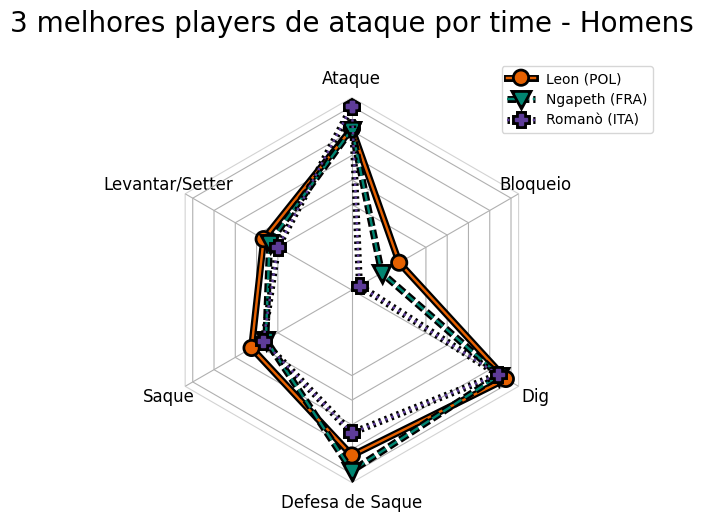

In [908]:
fig = plot_radar_chart(top_3_unique_teams, metrics, "3 melhores players de ataque por time - Homens")
plt.show()

In [909]:
# For the women
df_paris_women["avarage_rank"] = df_paris_women["Rank-scores"] + df_paris_women["Rank-attacker"] + df_paris_women["Rank-blocker"] + df_paris_women["Rank-digger"] + df_paris_women["Rank-server"] + df_paris_women["Rank-setter"]
df_sorted = df_paris_women.sort_values(by="avarage_rank", ascending=True) # Sort the dataframe by Rank-attacker
top_attackers_by_team = df_sorted.groupby('Team').head(1) # Get the top attacker from each team
top_3_unique_teams = top_attackers_by_team.head(3) # Get the top 3 unique teams
metrics = ['Success-percent-attack', 'Efficiency-percent-block', 'Success-percent-dig', 'Success-percent-receive', 'Success-percent-serve', 'Success-percent-setter']

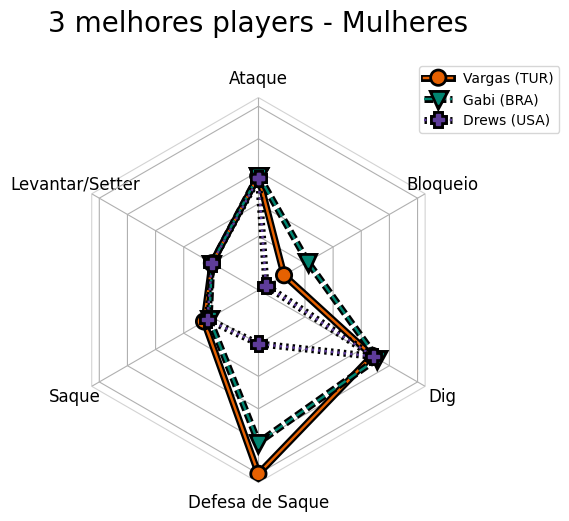

In [910]:
fig = plot_radar_chart(top_3_unique_teams, metrics, "3 melhores players - Mulheres")
plt.show()

In [911]:
# Fazendo o mesmo para os levantadores

In [912]:
# Men setters
df_sorted = df_paris_men.sort_values(by="Rank-setter", ascending=True) # Sort the dataframe by Rank-attacker
top_attackers_by_team = df_sorted.groupby('Team').head(1) # Get the top attacker from each team
top_3_unique_teams = top_attackers_by_team.head(3) # Get the top 3 unique teams
#metrics = ['Points-attacks', 'Succesful-blocks', 'Successful-dig', 'Succesful-receive', 'serve-points']
metrics = ['Success-percent-attack', 'Efficiency-percent-block', 'Success-percent-dig', 'Success-percent-receive', 'Success-percent-serve', 'Success-percent-setter']

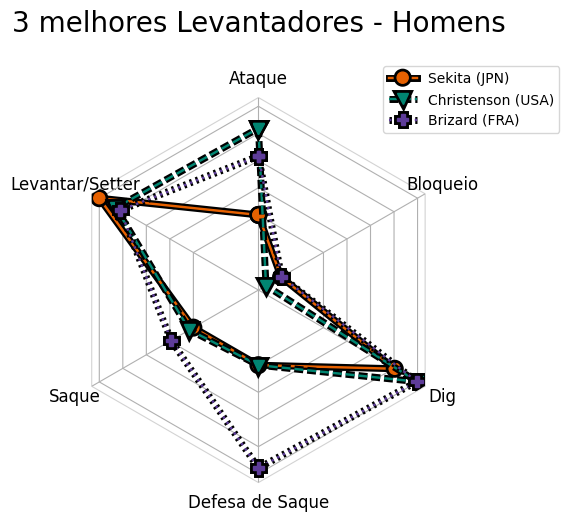

In [913]:
fig = plot_radar_chart(top_3_unique_teams, metrics, "3 melhores Levantadores - Homens")
plt.show()

In [914]:
# Women Setters
df_sorted = df_paris_women.sort_values(by="Rank-setter", ascending=True) # Sort the dataframe by Rank-attacker
top_attackers_by_team = df_sorted.groupby('Team').head(1) # Get the top attacker from each team
top_3_unique_teams = top_attackers_by_team.head(3) # Get the top 3 unique teams
#metrics = ['Points-attacks', 'Succesful-blocks', 'Successful-dig', 'Succesful-receive', 'serve-points']
metrics = ['Success-percent-attack', 'Efficiency-percent-block', 'Success-percent-dig', 'Success-percent-receive', 'Success-percent-serve', 'Success-percent-setter']

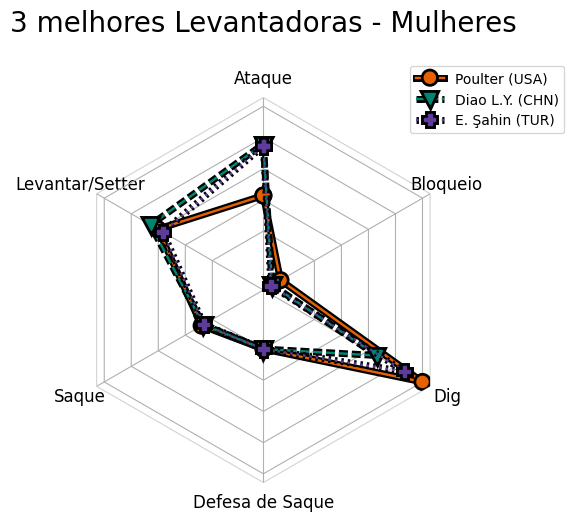

In [915]:
fig = plot_radar_chart(top_3_unique_teams, metrics, "3 melhores Levantadoras - Mulheres")
plt.show()

## Grafico de pontinhos

## Dados Geográficos do mundo: Feminino, Masculino e os dois juntos